<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Testing-image" data-toc-modified-id="Testing-image-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Testing image</a></span></li></ul></li><li><span><a href="#Testing-Module" data-toc-modified-id="Testing-Module-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Testing Module</a></span></li></ul></div>

In [1]:
from libvis import Vis
import libvis.modules as m
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import time
%load_ext autoreload
%autoreload 2

No module named 'bokeh'


In [2]:
try:
    vis.stop()
except:
    pass

In [3]:
vis = Vis(ws_port=7700, vis_port=7000)


Starting http at 7000


In [4]:

vis.start()

2020-06-10 22:14:53.213 | INFO     | legimens.websocket.server:start_server:33 - Starting ws server at localhost:7700


127.0.0.1 - - [10/Jun/2020 22:15:04] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Jun/2020 22:15:04] "GET /index.bundle.js?5a72d3d0745a4d4c9788 HTTP/1.1" 200 -


2020-06-10 22:15:05.609 | INFO     | legimens.App:_handler:76 - New ws connection of / from ::1
2020-06-10 22:15:05.611 | INFO     | legimens.App:_handler:88 - Sending root Legi_0x7f803908ef90
2020-06-10 22:15:05.627 | INFO     | legimens.App:_handler:76 - New ws connection of /undefined from ::1
2020-06-10 22:15:05.630 | ERROR    | legimens.App:_handle_obj_ref:98 - No child with ref undefined
2020-06-10 22:15:06.256 | INFO     | legimens.App:_handler:76 - New ws connection of /Legi_0x7f803908ef90 from ::1
2020-06-10 22:15:06.257 | INFO     | legimens.App:_handle_obj_ref:107 - Yield initial update {}


127.0.0.1 - - [10/Jun/2020 22:15:07] "GET /favicon.ico HTTP/1.1" 200 -


### Testing image

In [7]:
im = np.random.randn(120,101)*145
vis.vars.image = im


2020-04-29 21:17:22.147 | ERROR    | legimens.App:_handler:86 - Handling <class 'trio_websocket._impl.ConnectionClosed'> error:CloseReason<code=1001, name=GOING_AWAY, reason=None>


127.0.0.1 - - [29/Apr/2020 21:17:22] "GET /sockjs-node/153/x5vareow/htmlfile?c=_jp.amebq1s HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2020 21:17:22] "GET /sockjs-node/iframe.html HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2020 21:17:22] "GET /index.bundle.js?67a57f7b2984a3ab9d3c HTTP/1.1" 200 -


2020-04-29 21:17:22.916 | INFO     | legimens.App:_handler:71 - New ws connection of / from ::1
2020-04-29 21:17:22.917 | INFO     | legimens.App:_handler:83 - Sending root Legi_0x7f0a60ffdb80
2020-04-29 21:17:22.937 | INFO     | legimens.App:_handler:71 - New ws connection of /undefined from ::1
2020-04-29 21:17:22.940 | ERROR    | legimens.App:_handle_obj_ref:93 - No child with ref undefined


127.0.0.1 - - [29/Apr/2020 21:17:23] "POST /sockjs-node/153/kmhel4ul/xhr?t=1588213042995 HTTP/1.1" 200 -
----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 46228)
Traceback (most recent call last):
  File "/usr/lib/python3.8/socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.8/socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.8/socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.8/socketserver.py", line 720, in __init__
    self.handle()
  File "/usr/lib/python3.8/http/server.py", line 427, in handle
    self.handle_one_request()
  File "/usr/lib/python3.8/http/server.py", line 415, in handle_one_request
    method()
  File "/home/dali/side-projects-hobby/pywebviz/python/libvis/http_server.py", line 57, i

2020-04-29 21:17:23.526 | INFO     | legimens.App:_handler:71 - New ws connection of / from ::1
2020-04-29 21:17:23.527 | INFO     | legimens.App:_handler:83 - Sending root Legi_0x7f0a60ffdb80
2020-04-29 21:17:23.542 | INFO     | legimens.App:_handler:71 - New ws connection of /undefined from ::1
2020-04-29 21:17:23.544 | ERROR    | legimens.App:_handle_obj_ref:93 - No child with ref undefined


127.0.0.1 - - [29/Apr/2020 21:17:23] "GET /sockjs-node/153/3l30ehar/jsonp?c=_jp.afjjs0g HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2020 21:17:31] "GET /sockjs-node/info?t=1588213051719 HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2020 21:17:31] "GET /sockjs-node/307/0s5asntu/websocket HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2020 21:17:31] "POST /sockjs-node/307/o0yl2c4r/xhr_streaming?t=1588213051752 HTTP/1.1" 200 -
----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 46280)
Traceback (most recent call last):
  File "/usr/lib/python3.8/socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.8/socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.8/socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.8/socketserver.py", line 720, in

127.0.0.1 - - [29/Apr/2020 21:17:31] "POST /sockjs-node/307/o0yl2c4r/xhr_streaming?t=1588213051929 HTTP/1.1" 200 -
----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 46396)
Traceback (most recent call last):
  File "/usr/lib/python3.8/socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.8/socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.8/socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.8/socketserver.py", line 720, in __init__
    self.handle()
  File "/usr/lib/python3.8/http/server.py", line 427, in handle
    self.handle_one_request()
  File "/usr/lib/python3.8/http/server.py", line 415, in handle_one_request
    method()
  File "/home/dali/side-projects-hobby/pywebviz/python/libvis/http_server.py", 

127.0.0.1 - - [29/Apr/2020 21:17:32] "POST /sockjs-node/307/o0yl2c4r/xhr_streaming?t=1588213052113 HTTP/1.1" 200 -
----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 46448)
Traceback (most recent call last):
  File "/usr/lib/python3.8/socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.8/socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.8/socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.8/socketserver.py", line 720, in __init__
    self.handle()
  File "/usr/lib/python3.8/http/server.py", line 427, in handle
    self.handle_one_request()
  File "/usr/lib/python3.8/http/server.py", line 415, in handle_one_request
    method()
  File "/home/dali/side-projects-hobby/pywebviz/python/libvis/http_server.py", 

127.0.0.1 - - [29/Apr/2020 21:17:32] "POST /sockjs-node/307/o0yl2c4r/xhr_streaming?t=1588213052375 HTTP/1.1" 200 -
----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 46504)
Traceback (most recent call last):
  File "/usr/lib/python3.8/socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.8/socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.8/socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.8/socketserver.py", line 720, in __init__
    self.handle()
  File "/usr/lib/python3.8/http/server.py", line 427, in handle
    self.handle_one_request()
  File "/usr/lib/python3.8/http/server.py", line 415, in handle_one_request
    method()
  File "/home/dali/side-projects-hobby/pywebviz/python/libvis/http_server.py", 

2020-04-29 21:17:32.624 | INFO     | legimens.App:_handler:71 - New ws connection of / from ::1
2020-04-29 21:17:32.625 | INFO     | legimens.App:_handler:83 - Sending root Legi_0x7f0a60ffdb80
2020-04-29 21:17:32.639 | INFO     | legimens.App:_handler:71 - New ws connection of /undefined from ::1
2020-04-29 21:17:32.641 | ERROR    | legimens.App:_handle_obj_ref:93 - No child with ref undefined
2020-04-29 21:17:32.719 | INFO     | legimens.App:_handler:71 - New ws connection of /Legi_0x7f0a60ffdb80 from ::1
2020-04-29 21:17:32.765 | INFO     | legimens.App:_handle_obj_ref:102 - Yield initial update dict_keys(['image'])
2020-04-29 21:17:33.093 | ERROR    | legimens.App:_handler:86 - Handling <class 'trio_websocket._impl.ConnectionClosed'> error:CloseReason<code=1001, name=GOING_AWAY, reason=None>


127.0.0.1 - - [29/Apr/2020 21:17:33] "GET /sockjs-node/307/e4n4eknx/htmlfile?c=_jp.aeefvrp HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2020 21:17:33] "GET /index.bundle.js?67a57f7b2984a3ab9d3c HTTP/1.1" 200 -


2020-04-29 21:17:33.355 | INFO     | legimens.App:_handler:71 - New ws connection of / from ::1
2020-04-29 21:17:33.356 | INFO     | legimens.App:_handler:83 - Sending root Legi_0x7f0a60ffdb80
2020-04-29 21:17:33.373 | INFO     | legimens.App:_handler:71 - New ws connection of /undefined from ::1
2020-04-29 21:17:33.376 | ERROR    | legimens.App:_handle_obj_ref:93 - No child with ref undefined


127.0.0.1 - - [29/Apr/2020 21:17:33] "GET /sockjs-node/iframe.html HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2020 21:17:33] "GET /index.bundle.js?67a57f7b2984a3ab9d3c HTTP/1.1" 200 -


2020-04-29 21:17:33.758 | INFO     | legimens.App:_handler:71 - New ws connection of / from ::1
2020-04-29 21:17:33.763 | INFO     | legimens.App:_handler:83 - Sending root Legi_0x7f0a60ffdb80
2020-04-29 21:17:33.801 | INFO     | legimens.App:_handler:71 - New ws connection of /undefined from ::1
2020-04-29 21:17:33.827 | ERROR    | legimens.App:_handle_obj_ref:93 - No child with ref undefined


127.0.0.1 - - [29/Apr/2020 21:17:33] "POST /sockjs-node/307/4pgytqb1/xhr?t=1588213053824 HTTP/1.1" 200 -
----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 46546)
Traceback (most recent call last):
  File "/usr/lib/python3.8/socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.8/socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.8/socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.8/socketserver.py", line 720, in __init__
    self.handle()
  File "/usr/lib/python3.8/http/server.py", line 427, in handle
    self.handle_one_request()
  File "/usr/lib/python3.8/http/server.py", line 415, in handle_one_request
    method()
  File "/home/dali/side-projects-hobby/pywebviz/python/libvis/http_server.py", line 57, i

127.0.0.1 - - [29/Apr/2020 21:17:34] "POST /sockjs-node/307/4pgytqb1/xhr?t=1588213054064 HTTP/1.1" 200 -
----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 46582)
Traceback (most recent call last):
  File "/usr/lib/python3.8/socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.8/socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.8/socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.8/socketserver.py", line 720, in __init__
    self.handle()
  File "/usr/lib/python3.8/http/server.py", line 427, in handle
    self.handle_one_request()
  File "/usr/lib/python3.8/http/server.py", line 415, in handle_one_request
    method()
  File "/home/dali/side-projects-hobby/pywebviz/python/libvis/http_server.py", line 57, i

2020-04-29 21:17:34.511 | INFO     | legimens.App:_handler:71 - New ws connection of / from ::1
2020-04-29 21:17:34.516 | INFO     | legimens.App:_handler:83 - Sending root Legi_0x7f0a60ffdb80
2020-04-29 21:17:34.523 | INFO     | legimens.App:_handler:71 - New ws connection of /undefined from ::1
2020-04-29 21:17:34.525 | ERROR    | legimens.App:_handle_obj_ref:93 - No child with ref undefined


127.0.0.1 - - [29/Apr/2020 21:17:34] "POST /sockjs-node/307/4pgytqb1/xhr?t=1588213054227 HTTP/1.1" 200 -
----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 46622)
Traceback (most recent call last):
  File "/usr/lib/python3.8/socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.8/socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.8/socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.8/socketserver.py", line 720, in __init__
    self.handle()
  File "/usr/lib/python3.8/http/server.py", line 427, in handle
    self.handle_one_request()
  File "/usr/lib/python3.8/http/server.py", line 415, in handle_one_request
    method()
  File "/home/dali/side-projects-hobby/pywebviz/python/libvis/http_server.py", line 57, i

## Testing Module


In [9]:
from libvis.modules import Test as Mod
from libvis import VisVars
x = VisVars(mame=15)
y = VisVars(Cow='Moo')
y.x = x
vis.vars.q = y


ImportError: cannot import name 'Test' from 'libvis.modules' (/home/dali/side-projects-hobby/pywebviz/python/libvis/modules/__init__.py)

In [6]:
y.ad = 3

NameError: name 'y' is not defined

In [50]:
vis.vars.bii = [1]
for i in range(60):
    vis.vars.bii+=[np.random.randint(100)]
    time.sleep(.01)

2020-06-10 23:56:40.763 | INFO     | legimens.App:_handler:76 - New ws connection of / from ::1
2020-06-10 23:56:40.767 | INFO     | legimens.App:_handler:88 - Sending root Legi_0x7f803908ef90
2020-06-10 23:56:40.771 | ERROR    | legimens.App:_handler:91 - Handling <class 'trio_websocket._impl.ConnectionClosed'> error:CloseReason<code=1005, name=NO_STATUS_RCVD, reason=None>
2020-06-10 23:56:40.775 | INFO     | legimens.App:_handler:76 - New ws connection of /undefined from ::1
2020-06-10 23:56:40.776 | ERROR    | legimens.App:_handle_obj_ref:98 - No child with ref undefined
2020-06-10 23:56:40.835 | INFO     | legimens.App:_handler:76 - New ws connection of /Legi_0x7f803908ef90 from ::1
2020-06-10 23:56:41.318 | INFO     | legimens.App:_handle_obj_ref:107 - Yield initial update {"bii": {"value": [1, 28, 92, 94, 7, 44, 22, 7, 79, 30, 85, 12, 97, 78, 42, 45, 35, 23, 36, 16, 25, 14, 43, 80, 50, 85, 18, 9, 97, 63, 64, 33, 10, 49, 77, 91, 72, 44, 19, 83, 18, 33, 93, 4, 24, 8, 33, 17, 75, 89

2020-06-10 23:56:59.215 | INFO     | legimens.App:_handler:76 - New ws connection of / from ::1
2020-06-10 23:56:59.216 | INFO     | legimens.App:_handler:88 - Sending root Legi_0x7f803908ef90
2020-06-10 23:56:59.227 | ERROR    | legimens.App:_handler:91 - Handling <class 'trio_websocket._impl.ConnectionClosed'> error:CloseReason<code=1005, name=NO_STATUS_RCVD, reason=None>
2020-06-10 23:56:59.229 | INFO     | legimens.App:_handler:76 - New ws connection of /undefined from ::1
2020-06-10 23:56:59.230 | ERROR    | legimens.App:_handle_obj_ref:98 - No child with ref undefined
2020-06-10 23:56:59.312 | INFO     | legimens.App:_handler:76 - New ws connection of /Legi_0x7f803908ef90 from ::1
2020-06-10 23:56:59.786 | INFO     | legimens.App:_handle_obj_ref:107 - Yield initial update {"bii": {"value": [1, 28, 92, 94, 7, 44, 22, 7, 79, 30, 85, 12, 97, 78, 42, 45, 35, 23, 36, 16, 25, 14, 43, 80, 50, 85, 18, 9, 97, 63, 64, 33, 10, 49, 77, 91, 72, 44, 19, 83, 18, 33, 93, 4, 24, 8, 33, 17, 75, 89

2020-06-10 23:57:41.485 | INFO     | legimens.App:_handler:76 - New ws connection of / from ::1
2020-06-10 23:57:41.489 | INFO     | legimens.App:_handler:88 - Sending root Legi_0x7f803908ef90
2020-06-10 23:57:41.499 | INFO     | legimens.App:_handler:76 - New ws connection of /undefined from ::1
2020-06-10 23:57:41.505 | ERROR    | legimens.App:_handle_obj_ref:98 - No child with ref undefined
2020-06-10 23:57:41.513 | ERROR    | legimens.App:_handler:91 - Handling <class 'trio_websocket._impl.ConnectionClosed'> error:CloseReason<code=1005, name=NO_STATUS_RCVD, reason=None>
2020-06-10 23:57:41.584 | INFO     | legimens.App:_handler:76 - New ws connection of /Legi_0x7f803908ef90 from ::1
2020-06-10 23:57:42.036 | INFO     | legimens.App:_handle_obj_ref:107 - Yield initial update {"bii": {"value": [1, 28, 92, 94, 7, 44, 22, 7, 79, 30, 85, 12, 97, 78, 42, 45, 35, 23, 36, 16, 25, 14, 43, 80, 50, 85, 18, 9, 97, 63, 64, 33, 10, 49, 77, 91, 72, 44, 19, 83, 18, 33, 93, 4, 24, 8, 33, 17, 75, 89

In [60]:
%%time

for i in tqdm.tqdm_notebook(range(100)):
    vis.vars.test=np.sin(
        [
         np.linspace(0 +i/10,10+i/10, 40)
        ,np.linspace(10+i/5, 10+i/10, 40)
        ,np.linspace(10+i/5, 5 +i/10, 40)
        ]
    ).tolist()
    time.sleep(0.1)
#jkjkvis.vars['test']

<timed exec>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



CPU times: user 1.46 s, sys: 111 ms, total: 1.57 s
Wall time: 10.9 s
2020-06-11 00:16:42.259 | INFO     | legimens.App:_handler:76 - New ws connection of / from ::1
2020-06-11 00:16:42.263 | INFO     | legimens.App:_handler:88 - Sending root Legi_0x7f803908ef90
2020-06-11 00:16:42.268 | ERROR    | legimens.App:_handler:91 - Handling <class 'trio_websocket._impl.ConnectionClosed'> error:CloseReason<code=1005, name=NO_STATUS_RCVD, reason=None>
2020-06-11 00:16:42.273 | INFO     | legimens.App:_handler:76 - New ws connection of /undefined from ::1
2020-06-11 00:16:42.277 | ERROR    | legimens.App:_handle_obj_ref:98 - No child with ref undefined
2020-06-11 00:16:42.362 | INFO     | legimens.App:_handler:76 - New ws connection of /Legi_0x7f803908ef90 from ::1
2020-06-11 00:16:43.100 | INFO     | legimens.App:_handle_obj_ref:107 - Yield initial update {"bii": {"value": [1, 28, 92, 94, 7, 44, 22, 7, 79, 30, 85, 12, 97, 78, 42, 45, 35, 23, 36, 16, 25, 14, 43, 80, 50, 85, 18, 9, 97, 63, 64, 33

2020-06-11 00:17:38.319 | INFO     | legimens.App:_handler:76 - New ws connection of / from ::1
2020-06-11 00:17:38.321 | INFO     | legimens.App:_handler:88 - Sending root Legi_0x7f803908ef90
2020-06-11 00:17:38.350 | ERROR    | legimens.App:_handler:91 - Handling <class 'trio_websocket._impl.ConnectionClosed'> error:CloseReason<code=1005, name=NO_STATUS_RCVD, reason=None>
2020-06-11 00:17:38.357 | INFO     | legimens.App:_handler:76 - New ws connection of /undefined from ::1
2020-06-11 00:17:38.365 | ERROR    | legimens.App:_handle_obj_ref:98 - No child with ref undefined
2020-06-11 00:17:38.602 | INFO     | legimens.App:_handler:76 - New ws connection of /Legi_0x7f803908ef90 from ::1
2020-06-11 00:17:39.231 | INFO     | legimens.App:_handle_obj_ref:107 - Yield initial update {"bii": {"value": [1, 28, 92, 94, 7, 44, 22, 7, 79, 30, 85, 12, 97, 78, 42, 45, 35, 23, 36, 16, 25, 14, 43, 80, 50, 85, 18, 9, 97, 63, 64, 33, 10, 49, 77, 91, 72, 44, 19, 83, 18, 33, 93, 4, 24, 8, 33, 17, 75, 89

2020-06-11 00:17:57.909 | INFO     | legimens.App:_handler:76 - New ws connection of / from ::1
2020-06-11 00:17:57.910 | INFO     | legimens.App:_handler:88 - Sending root Legi_0x7f803908ef90
2020-06-11 00:17:57.917 | ERROR    | legimens.App:_handler:91 - Handling <class 'trio_websocket._impl.ConnectionClosed'> error:CloseReason<code=1005, name=NO_STATUS_RCVD, reason=None>
2020-06-11 00:17:57.939 | INFO     | legimens.App:_handler:76 - New ws connection of /undefined from ::1
2020-06-11 00:17:57.948 | ERROR    | legimens.App:_handle_obj_ref:98 - No child with ref undefined
2020-06-11 00:17:58.068 | INFO     | legimens.App:_handler:76 - New ws connection of /Legi_0x7f803908ef90 from ::1
2020-06-11 00:17:58.564 | INFO     | legimens.App:_handle_obj_ref:107 - Yield initial update {"bii": {"value": [1, 28, 92, 94, 7, 44, 22, 7, 79, 30, 85, 12, 97, 78, 42, 45, 35, 23, 36, 16, 25, 14, 43, 80, 50, 85, 18, 9, 97, 63, 64, 33, 10, 49, 77, 91, 72, 44, 19, 83, 18, 33, 93, 4, 24, 8, 33, 17, 75, 89

2020-06-11 00:18:34.925 | INFO     | legimens.App:_handler:76 - New ws connection of / from ::1
2020-06-11 00:18:34.931 | INFO     | legimens.App:_handler:88 - Sending root Legi_0x7f803908ef90
2020-06-11 00:18:34.953 | INFO     | legimens.App:_handler:76 - New ws connection of /undefined from ::1
2020-06-11 00:18:34.974 | ERROR    | legimens.App:_handle_obj_ref:98 - No child with ref undefined
2020-06-11 00:18:34.981 | ERROR    | legimens.App:_handler:91 - Handling <class 'trio_websocket._impl.ConnectionClosed'> error:CloseReason<code=1005, name=NO_STATUS_RCVD, reason=None>
2020-06-11 00:18:35.310 | INFO     | legimens.App:_handler:76 - New ws connection of /Legi_0x7f803908ef90 from ::1
2020-06-11 00:18:35.832 | INFO     | legimens.App:_handle_obj_ref:107 - Yield initial update {"bii": {"value": [1, 28, 92, 94, 7, 44, 22, 7, 79, 30, 85, 12, 97, 78, 42, 45, 35, 23, 36, 16, 25, 14, 43, 80, 50, 85, 18, 9, 97, 63, 64, 33, 10, 49, 77, 91, 72, 44, 19, 83, 18, 33, 93, 4, 24, 8, 33, 17, 75, 89

2020-06-11 00:18:45.431 | INFO     | legimens.App:_handler:76 - New ws connection of / from ::1
2020-06-11 00:18:45.432 | INFO     | legimens.App:_handler:88 - Sending root Legi_0x7f803908ef90
2020-06-11 00:18:45.444 | INFO     | legimens.App:_handler:76 - New ws connection of /undefined from ::1
2020-06-11 00:18:45.445 | ERROR    | legimens.App:_handle_obj_ref:98 - No child with ref undefined
2020-06-11 00:18:45.448 | ERROR    | legimens.App:_handler:91 - Handling <class 'trio_websocket._impl.ConnectionClosed'> error:CloseReason<code=1005, name=NO_STATUS_RCVD, reason=None>
2020-06-11 00:18:45.621 | INFO     | legimens.App:_handler:76 - New ws connection of /Legi_0x7f803908ef90 from ::1
2020-06-11 00:18:46.165 | INFO     | legimens.App:_handle_obj_ref:107 - Yield initial update {"bii": {"value": [1, 28, 92, 94, 7, 44, 22, 7, 79, 30, 85, 12, 97, 78, 42, 45, 35, 23, 36, 16, 25, 14, 43, 80, 50, 85, 18, 9, 97, 63, 64, 33, 10, 49, 77, 91, 72, 44, 19, 83, 18, 33, 93, 4, 24, 8, 33, 17, 75, 89

2020-06-11 00:19:03.705 | INFO     | legimens.App:_handler:76 - New ws connection of / from ::1
2020-06-11 00:19:03.710 | INFO     | legimens.App:_handler:88 - Sending root Legi_0x7f803908ef90
2020-06-11 00:19:03.721 | INFO     | legimens.App:_handler:76 - New ws connection of /undefined from ::1
2020-06-11 00:19:03.741 | ERROR    | legimens.App:_handle_obj_ref:98 - No child with ref undefined
2020-06-11 00:19:03.892 | ERROR    | legimens.App:_handler:91 - Handling <class 'trio_websocket._impl.ConnectionClosed'> error:CloseReason<code=1005, name=NO_STATUS_RCVD, reason=None>
2020-06-11 00:19:03.978 | INFO     | legimens.App:_handler:76 - New ws connection of /Legi_0x7f803908ef90 from ::1
2020-06-11 00:19:04.505 | INFO     | legimens.App:_handle_obj_ref:107 - Yield initial update {"bii": {"value": [1, 28, 92, 94, 7, 44, 22, 7, 79, 30, 85, 12, 97, 78, 42, 45, 35, 23, 36, 16, 25, 14, 43, 80, 50, 85, 18, 9, 97, 63, 64, 33, 10, 49, 77, 91, 72, 44, 19, 83, 18, 33, 93, 4, 24, 8, 33, 17, 75, 89

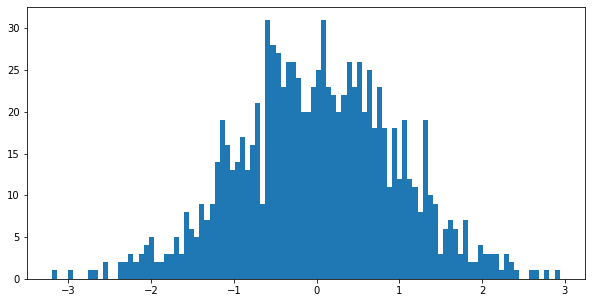

In [46]:
# generate df
N = np.random.randn(1000)
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(N,bins=100)
vis.vars.image = fig


In [27]:
from bokeh.plotting import figure
from bokeh.transform import linear_cmap
from bokeh.util.hex import hexbin
from bokeh.embed import file_html
import bokeh

n = 50000
x = np.random.standard_normal(n)
y = np.random.standard_normal(n)

bins = hexbin(x, y, 0.1)

p = figure(title="Manual hex bin for 50000 points", tools="wheel_zoom,pan,reset",
           match_aspect=True,
           sizing_mode='stretch_both',
           plot_width=300, plot_height=300,
           background_fill_color='#440154')
p.grid.visible = False

p.hex_tile(q="q", r="r", size=0.1, line_color=None, source=bins,
           fill_color=linear_cmap('counts', 'Viridis256', 0, max(bins.counts)))
type(p)

vis.vars.bokeh = p
print(isinstance(p,bokeh.model.Model))
print(isinstance(p,bokeh.document.document.Document))

#output_file("hex_tile.html")

True
False


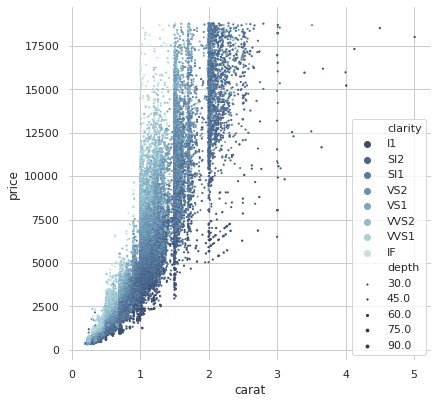

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Load the example iris dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

vis.vars.sns = f

In [2]:
import cv2


In [6]:
cap = cv2.VideoCapture(3)
cap.isOpened()


False

In [7]:
f = plt.figure()
for i in range(100):
    ret, frame = cap.read()
    #im = np.concatenate((im,255*np.ones(im.shape[:-1])))
    
    #f = plt.figure()
            #plt.imshow(im)kkkkk
    if ret:
        vis.vars.image = frame[:480,:480,:]
    
    time.sleep(0.1)
    

NameError: name 'plt' is not defined

In [8]:
frame.shape

(480, 640, 3)

In [10]:
%%javascript

$('#header').toggle();
$('div#site').css("height","100%")

<IPython.core.display.Javascript object>